# Capstone: Predicting Forest Fires

**Overview**: Science has changed the way we deal with natural disasters. Today's disaster management departments are able to plan better by being informed using past data and by data driven decisions.

One such problem is to predict the area burned due to forest fires. I am leveraging data set from https://archive.ics.uci.edu/dataset/162/forest+fires.This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.
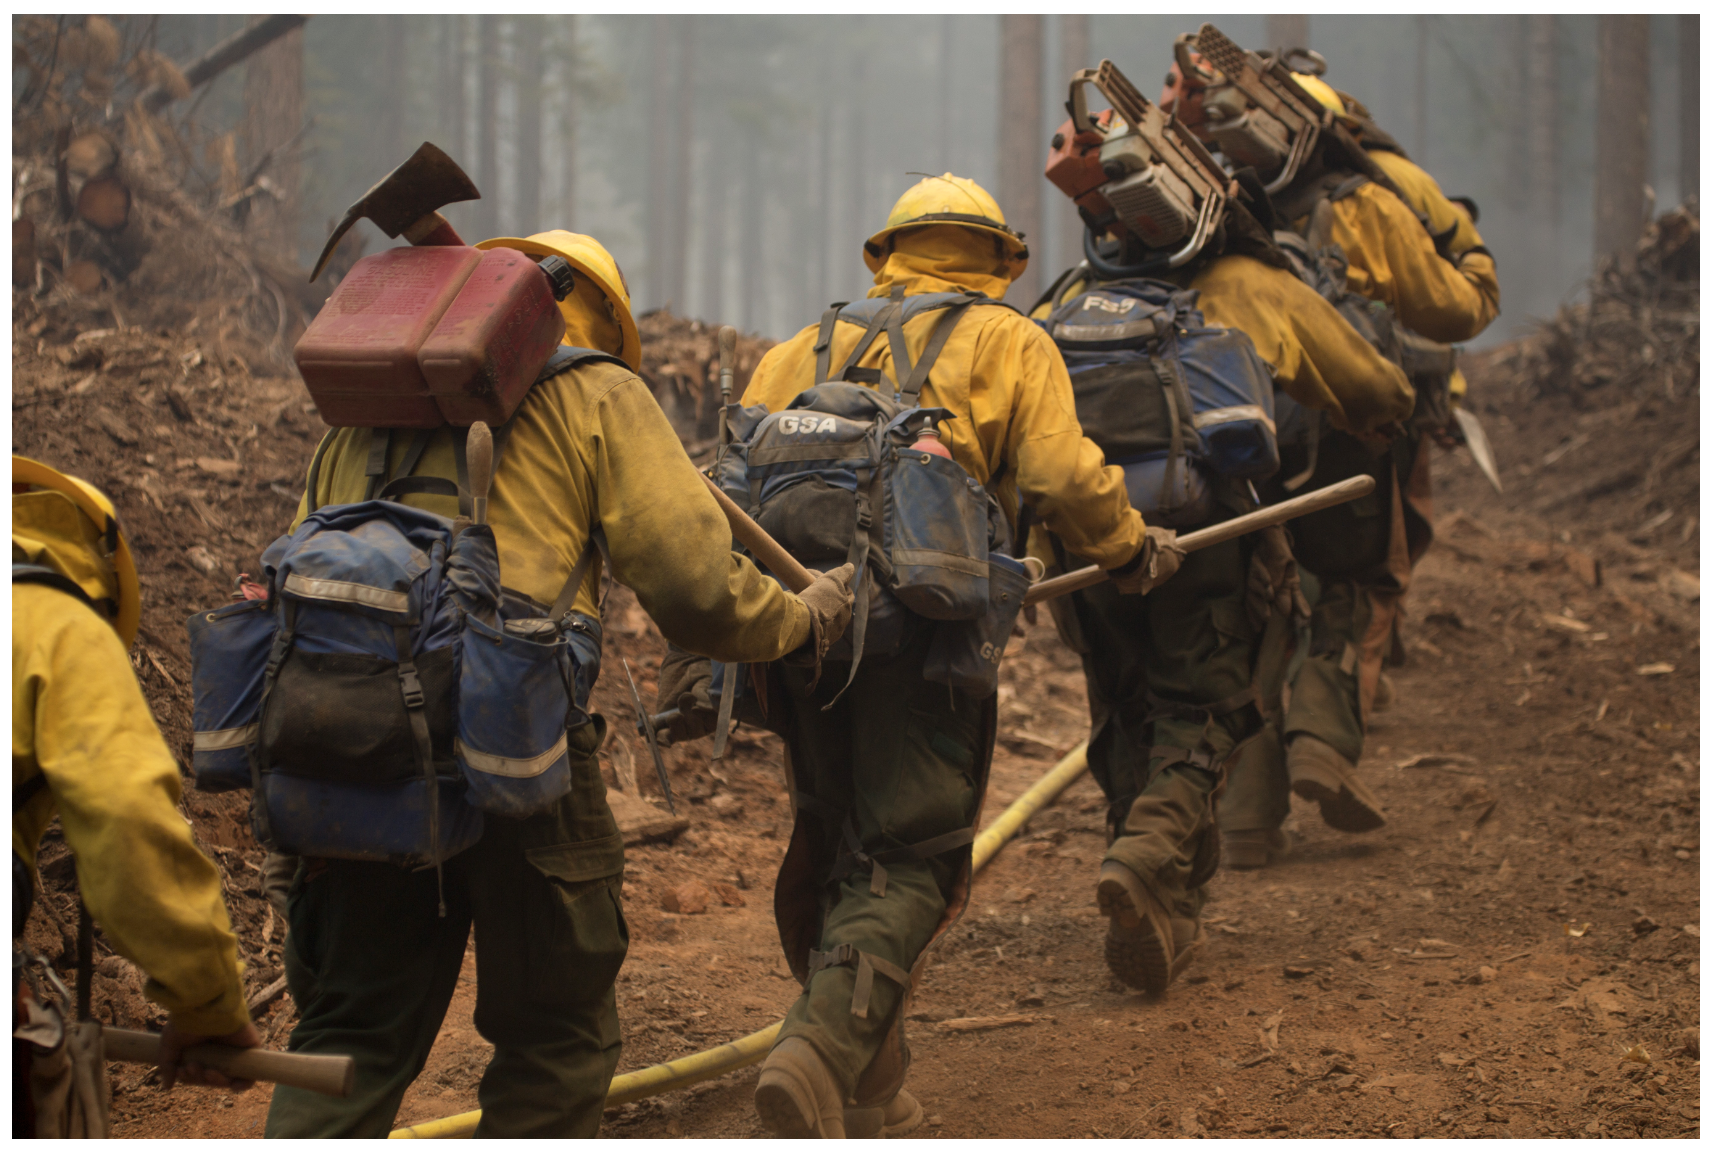
**Scope**: In this project, my goal is to compare the performance of the Regressors such as K Nearest Neighbor, Linear Regression, Ensemble models and Support Vector Machines.  

**Data Overview**: The data is related to Climate and environemnt data. Its is small dataset with 517 instances and 12 multivariate features.


## Section 1: Read in the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import xgboost
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import time
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

from sklearn.svm import SVC, SVR
import math 

from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
input_df = pd.read_csv('/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Capstone/forest+fires/forestfires.csv', sep = ',')
    #'/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical 3/Bank_Project/bank+marketing/bank/bank-full.csv', sep=";")
print('Total number of records in data', len(input_df))

Total number of records in data 517


In [3]:
input_df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [4]:
features = input_df.columns.tolist()
print(f'Number of Features: {len(features)}')
#print(features)
input_df.dtypes

Number of Features: 13


X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## Section 2: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
Variable Name	Type	
X:              Integer	x-axis spatial coordinate within the Montesinho park map: 1 to 9		
Y:              Integer	y-axis spatial coordinate within the Montesinho park map: 2 to 9		
month:          Categorical	month of the year: 'jan' to 'dec'		
day:            Categorical	day of the week: 'mon' to 'sun'		
FFMC:           Continuous	FFMC index from the FWI system: 18.7 to 96.20		
DMC:            Integer         DMC index from the FWI system: 1.1 to 291.3		
DC:             Continuous	DC index from the FWI system: 7.9 to 860.6		
ISI:            Continuous	ISI index from the FWI system: 0.0 to 56.10		
temp:           Continuous	temperature: 2.2 to 33.30	Celsius degrees	
RH:             Integer	relative humidity: 15.0 to 100	%	
wind:       	Continuous	wind speed: 0.40 to 9.40	km/h	
rain:           Integer	outside rain: 0.0 to 6.4	mm/m2	

Output variable (desired target):
area is the Target which is of type Integer	
It represents the burned area of the forest: 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).
```



In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### Understanding Categorical Variables ###

In [6]:
cat_df = input_df.select_dtypes(include=object)
cat_features = cat_df.columns.tolist()
print(f'Number of categorical features: {len(cat_features)}')
cat_df


Number of categorical features: 2


month  day
0     mar  fri
1     oct  tue
2     oct  sat
3     mar  fri
4     mar  sun
..    ...  ...
512   aug  sun
513   aug  sun
514   aug  sun
515   aug  sat
516   nov  tue

[517 rows x 2 columns]

### Histograms of all numeric features in the data

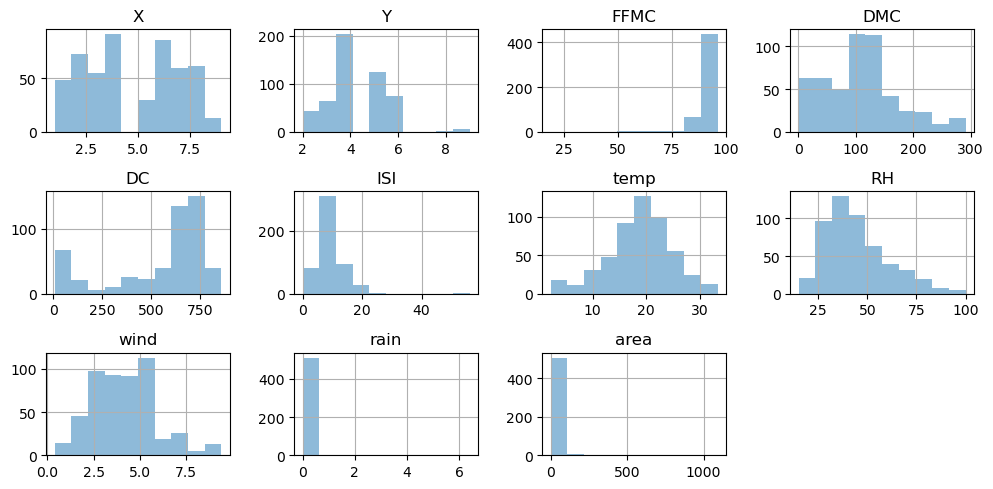

In [7]:
allhistograms = input_df.hist(figsize= [10,5], layout=(3,4), alpha=0.5)
plt.tight_layout()
allhistograms
plt.show()

## Observations: 
#### - X and Y are binomial distributions
#### - FFMC, is right skewed and so is DC and ISI
#### - DMC also seems to be binomial distribution wih left skew
#### - Rain and area are highly skewed and may need a logarithmic transformation
#### - Distribution of wind is close to normal


## Tranforming target


Target: Distribution of Area


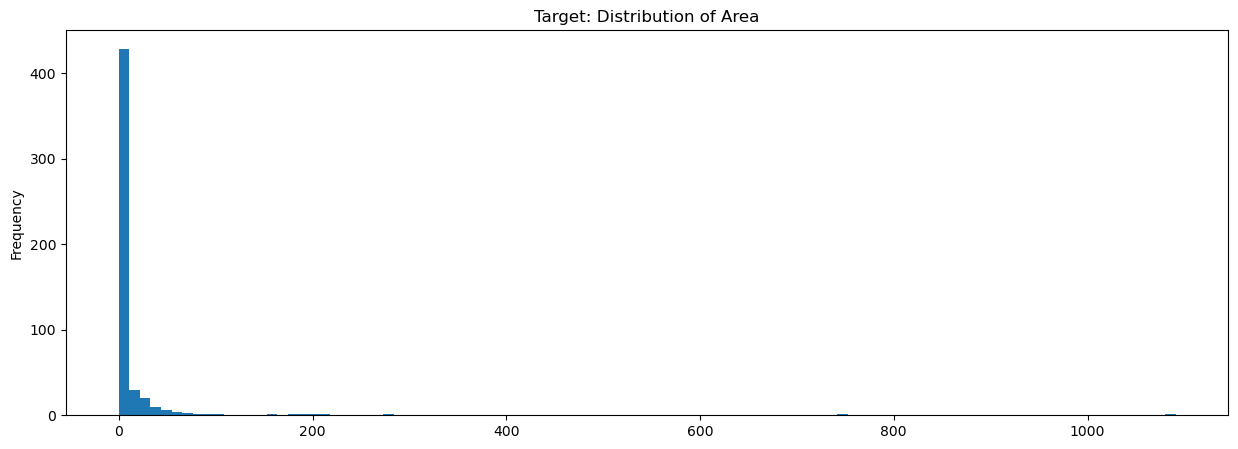

The distribution is very skewed and hence, I am transforming into ln


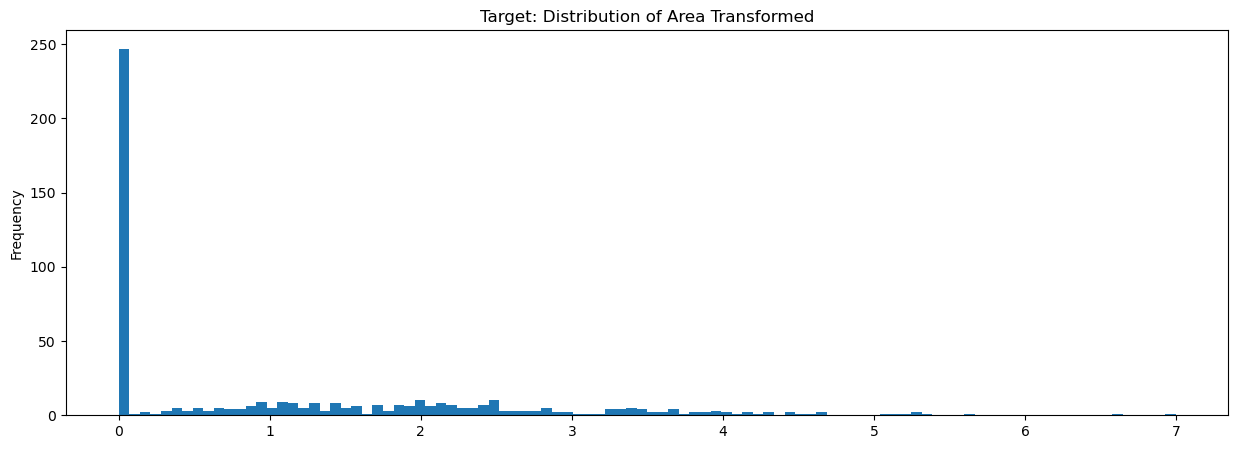

In [8]:

print('\nTarget: Distribution of Area')
input_df['area'].plot(kind='hist', 
                               bins=100, 
                              figsize=(15, 5), 
                              title=f'Distribution of Area')
plt.title('Target: Distribution of Area')
plt.show()
print("The distribution is very skewed and hence, I am transforming into ln")


input_df['area'].apply(np.log1p).plot(kind='hist', 
                               bins=100, 
                              figsize=(15, 5), 
                              title=f'Distribution of Area')
#sns.histplot( x=target_area)

plt.title('Target: Distribution of Area Transformed')
plt.show()


#### Hence, log transforming the data can make area follow more like a normal distribution

In [9]:
target_area = np.log(input_df['area'])
# input_df['area'] = target_area

inf_rows = target_area.isin([np.inf, -np.inf])
print("\nInfinity values in area after log transformation" , np.sum(inf_rows))




Infinity values in area after log transformation 247


/Users/apoorvaacharya/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### However, area values after log tranformation has about 50% of infinity values, so the tranformation does not work


 Infinity values in area after log transformation + constant 0


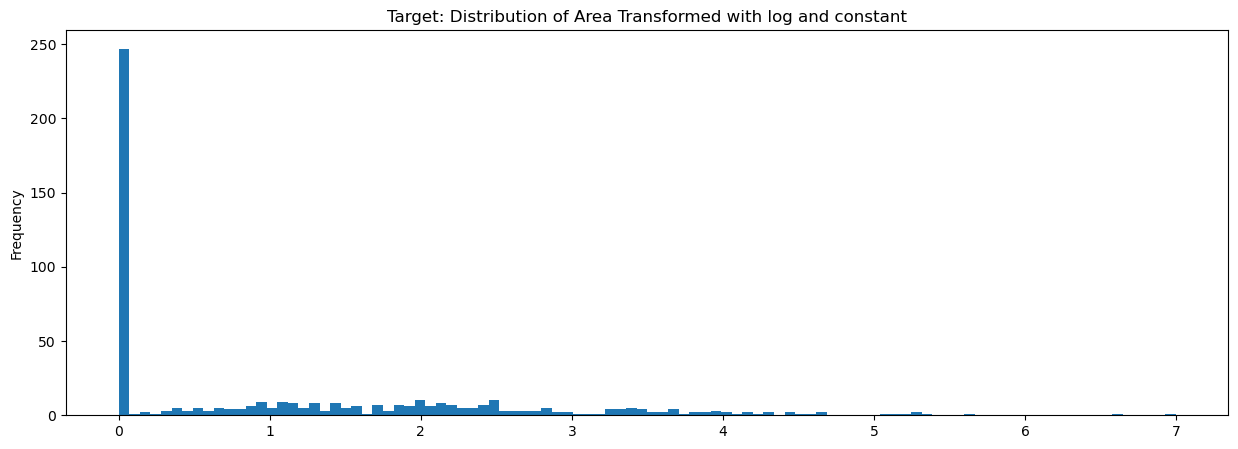

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64

In [10]:
## Adding a constant to log transformation
# 
area_transformed = np.log(input_df['area'] + 1)  # Add 1 before log transformation
inf_rows_new = area_transformed.isin([np.inf, -np.inf])
print("\n Infinity values in area after log transformation + constant" , np.sum(inf_rows_new))

## Now lets plot the area transformed with log and constant

area_transformed.plot(kind='hist', 
                               bins=100, 
                              figsize=(15, 5), 
                              title=f'Distribution of Area')
#sns.histplot( x=target_area)

plt.title('Target: Distribution of Area Transformed with log and constant')
plt.show()

input_df['areaT'] = area_transformed

area_transformed.describe()

### Burns by months

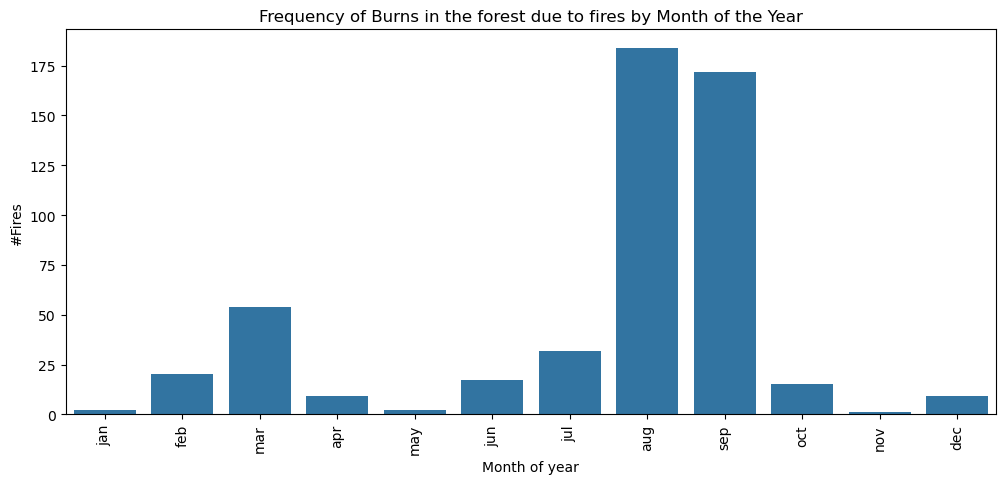

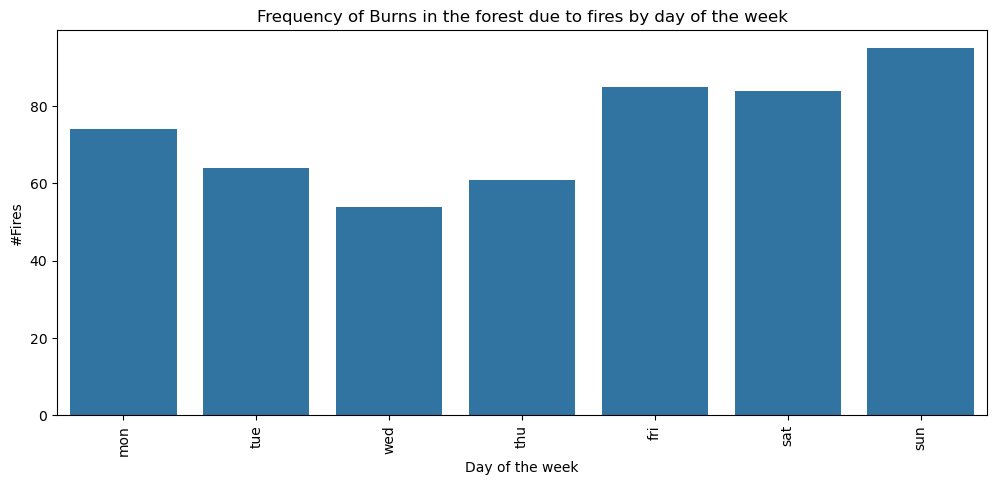

/var/folders/0m/d5qp0g8x6l18qjc_gydmnq9r0000gp/T/ipykernel_69753/2311488818.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  input_df.groupby(['month', 'day']).size().unstack().plot(kind='bar', stacked=True)


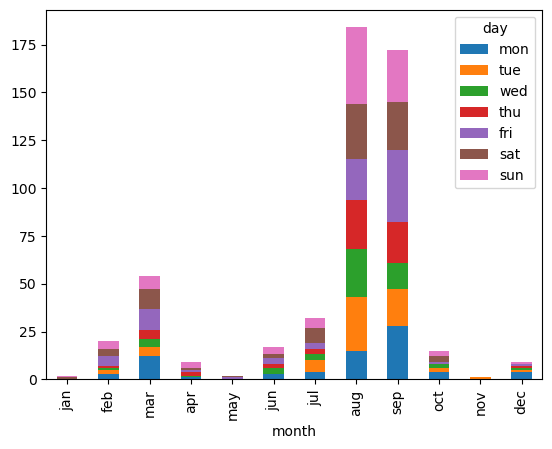

In [11]:
## ORdering month and day in the order of occurence

input_df["month"] = pd.Categorical(input_df["month"],
                             categories=["jan", "feb", "mar", "apr", "may", "jun", "jul",
                                         "aug", "sep", "oct", "nov", "dec"],
                             ordered=True)
input_df["day"] = pd.Categorical(input_df["day"],
                             categories=["mon", "tue", "wed", "thu", "fri", "sat", "sun"],
                             ordered=True)

plt.figure(figsize=[12,5])
sns.countplot(data=input_df, x='month')
plt.title("Frequency of Burns in the forest due to fires by Month of the Year")
plt.xlabel("Month of year")
plt.ylabel("#Fires")
plt.xticks(rotation=90)
plt.show()
# pd.crosstab(bank_input_df.y, bank_input_df.campaign)
# percentage= round(bank_input_df['campaign'].isin([1,2,3,4,5]).sum()/len(bank_input_df['campaign']), 2)*100
# print(f'Conclusion: {percentage}% records are in campaigns : 1,2,3,4 & 5')



plt.figure(figsize=[12,5])
sns.countplot(data=input_df, x='day')
plt.title("Frequency of Burns in the forest due to fires by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("#Fires")
plt.xticks(rotation=90)

# pd.crosstab(bank_input_df.y, bank_input_df.campaign)
# percentage= round(bank_input_df['campaign'].isin([1,2,3,4,5]).sum()/len(bank_input_df['campaign']), 2)*100
# print(f'Conclusion: {percentage}% records are in campaigns : 1,2,3,4 & 5')

plt.show()


pd.crosstab(input_df.month, input_df.day)
input_df.groupby(['month', 'day']).size().unstack().plot(kind='bar', stacked=True)

plt.show()

## Observations:
#### - August and September seem to have high fire occurences

#### - Weekends incling friday has higher burns than other days. I wonder if this is to do with majority of workers not being available to put off fires on weekend.s This however, is only a deduction and my interpretation of data

#### - When we look at number of fires by month and day, it is clear that the fires are still high in August and September. However, there seems to be no particular skew or variability across days of the week 

Text(0, 0.5, 'Burned Area due to forst fires  in ha')

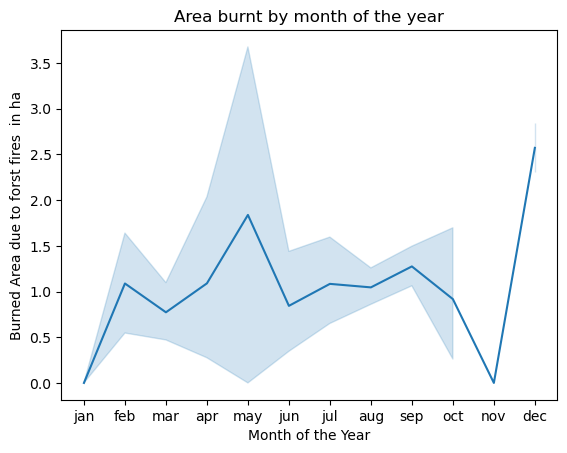

In [12]:
### Area burnt by month of the year

sns.lineplot(data = input_df, y = 'areaT', x ='month')
plt.title("Area burnt by month of the year")
plt.xlabel("Month of the Year")
plt.ylabel("Burned Area due to forst fires  in ha")

## Observations:
#### - A high burned area seem to be increasing from March till october, there is a peak seen in the month of May and December
#### - Although, there is decline in area burnt in october, there is maximum peak in December.

### Plotting Climatic conditions:  Temperature, Rain, Wind and Relative humity (RH) by Month

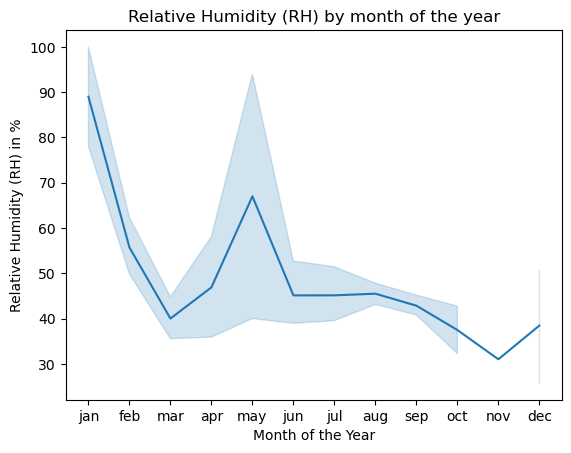

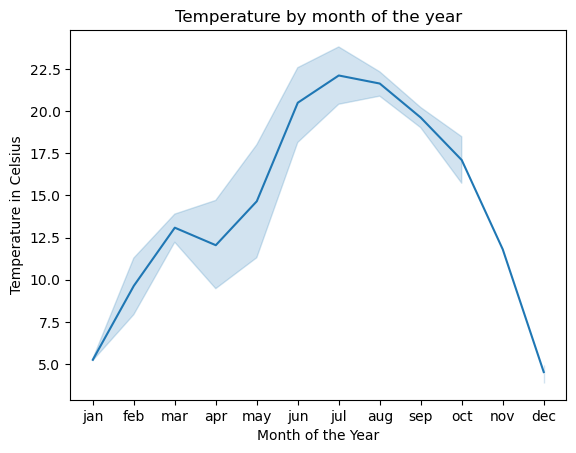

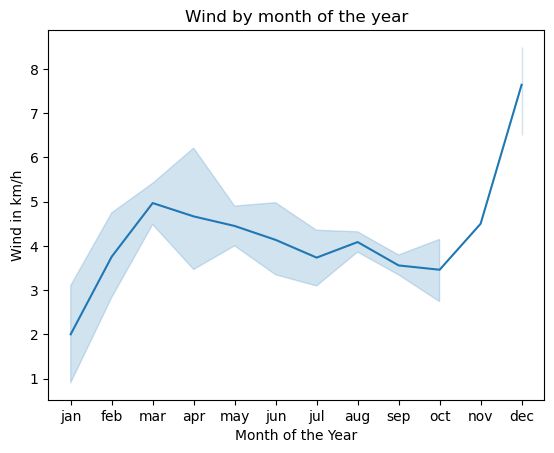

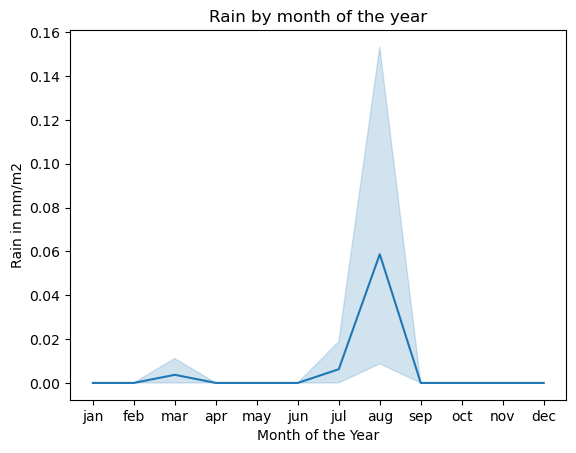

In [13]:
### Relative Humidity
sns.lineplot(data = input_df, y = 'RH', x ='month')
plt.title("Relative Humidity (RH) by month of the year")
plt.xlabel("Month of the Year")
plt.ylabel("Relative Humidity (RH) in %")
plt.show()


### Temperature
sns.lineplot(data = input_df, y = 'temp', x ='month')
plt.title("Temperature by month of the year")
plt.xlabel("Month of the Year")
plt.ylabel("Temperature in Celsius")
plt.show()


### Wind
sns.lineplot(data = input_df, y = 'wind', x ='month')
plt.title("Wind by month of the year")
plt.xlabel("Month of the Year")
plt.ylabel("Wind in km/h")
plt.show()


### Rain
sns.lineplot(data = input_df, y = 'rain', x ='month')
plt.title("Rain by month of the year")
plt.xlabel("Month of the Year")
plt.ylabel("Rain in mm/m2")
plt.show()

### Observations

#### -  Relative humity is highest in January 

#### - Temperatue peaks around May and goes beyond 15 degrees and starts decresing around November to under 10 degrees.

#### - Wind peaks in the month of feb and continues to peak and reaches maximum in november and december, although it gradually decreases in oct before it peaks

#### - Rain is highly peaking in only August. It is a wonder that burnt area is high in that same month as well.

### Heatmap between rain and burned area of the year

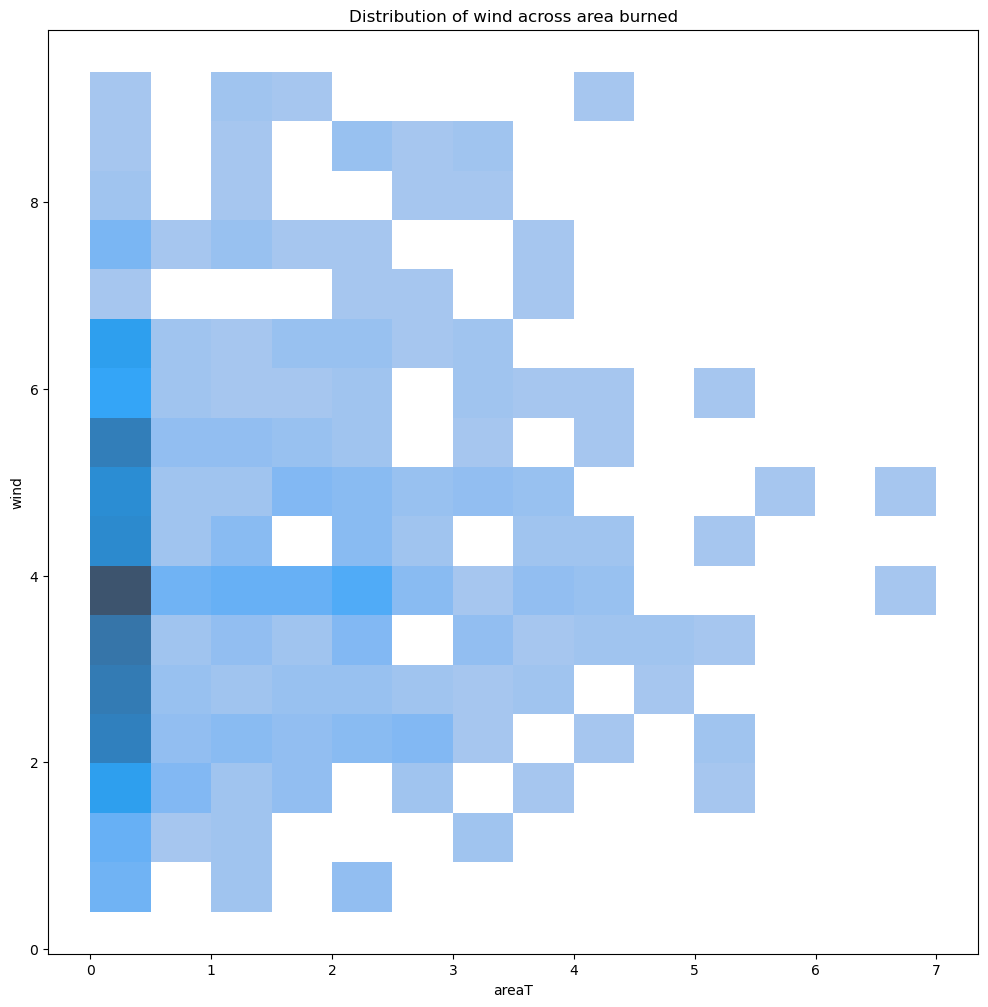

Text(0.5, 1.0, 'Distribution of temperature in Celcius across area burned')

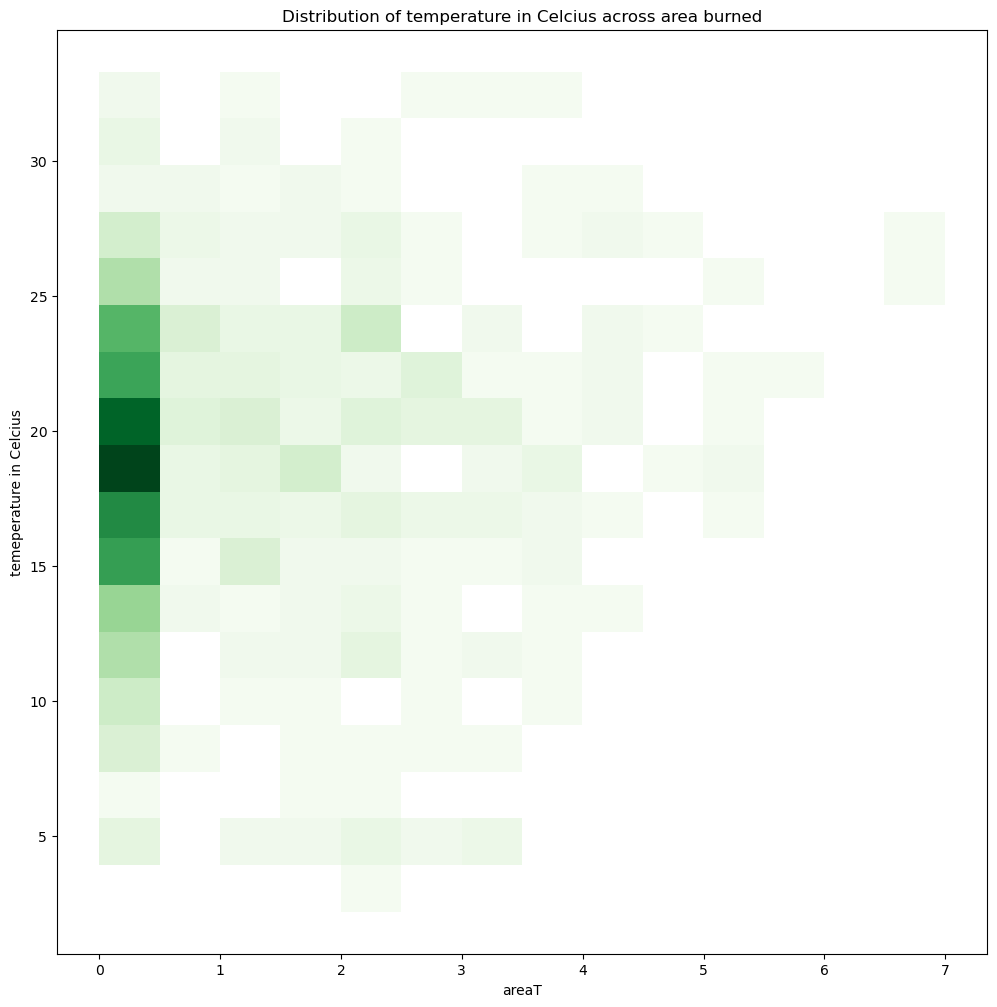

In [14]:
## ## Heatmap between rain and area

plt.figure(figsize=[12,12])
#sns.heatmap(pd.crosstab(input_df.area, input_df.wind, normalize = True),cmap='Blues', fmt='.2f', annot=True)
sns.histplot(data = input_df, x = 'areaT', y = 'wind')
plt.title("Distribution of wind across area burned")
plt.show()

## ## Heatmap between temperature and area

plt.figure(figsize=[12,12])
#sns.heatmap(pd.crosstab(input_df.area, input_df.wind, normalize = True),cmap='Blues', fmt='.2f', annot=True)
sns.histplot(data = input_df, x = 'areaT', y = 'temp', cmap = "Greens")
plt.ylabel("temeperature in Celcius")
plt.title("Distribution of temperature in Celcius across area burned")

### Observations

#### - High wind and temperature does not seem to guarentee high likelihood of higher burned area 

<Axes: xlabel='X', ylabel='Y'>

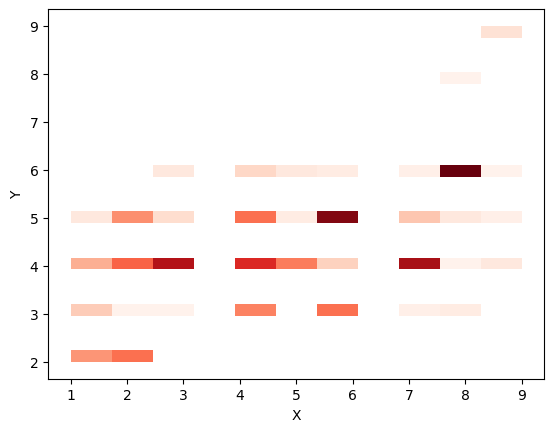

In [15]:
## plotting X, Y cooridnates
# 
sns.histplot(data = input_df , x ='X',y = 'Y', cmap = "Reds")

## Section 3: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Problem Statement: Predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data 

In [16]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       517 non-null    int64   
 1   Y       517 non-null    int64   
 2   month   517 non-null    category
 3   day     517 non-null    category
 4   FFMC    517 non-null    float64 
 5   DMC     517 non-null    float64 
 6   DC      517 non-null    float64 
 7   ISI     517 non-null    float64 
 8   temp    517 non-null    float64 
 9   RH      517 non-null    int64   
 10  wind    517 non-null    float64 
 11  rain    517 non-null    float64 
 12  area    517 non-null    float64 
 13  areaT   517 non-null    float64 
dtypes: category(2), float64(9), int64(3)
memory usage: 50.3 KB


## Section 4: Feature Engineering

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### No null values to be removed

In [17]:
input_df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
areaT    0
dtype: int64

#### Creating target and feature based split

In [18]:
## Since we dont need the column area for training, let remove it from X
X = input_df.drop(['areaT', 'area'], axis=1)
y = input_df['areaT']


In [19]:

Xcat_features = X.select_dtypes(include='category').columns.tolist()
Xnum_features = X.select_dtypes(exclude='category').columns.tolist()
print("Print categorical columns in the dataframe:", Xcat_features)
print("Print numerical columns in the dataframe:", Xnum_features)


Print categorical columns in the dataframe: ['month', 'day']
Print numerical columns in the dataframe: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


#### Encoded each categorical feature value to boolean and scaled all numerical features

In [20]:

transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), np.array(Xcat_features)),(StandardScaler(), np.array(Xnum_features)))
transformed = transformer.fit_transform(X)

encoded_feature_names = transformer.get_feature_names_out()
encoded_feature_names = [x.replace("onehotencoder__", "") for x in encoded_feature_names] 
encoded_feature_names = [x.replace("standardscaler__", "") for x in encoded_feature_names] 


X_transformed = pd.DataFrame(transformed, columns = encoded_feature_names)
X_transformed

month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0          0.0        0.0        0.0        0.0        0.0        0.0   
1          0.0        0.0        0.0        0.0        0.0        0.0   
2          0.0        0.0        0.0        0.0        0.0        0.0   
3          0.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
512        0.0        1.0        0.0        0.0        0.0        0.0   
513        0.0        1.0        0.0        0.0        0.0        0.0   
514        0.0        1.0        0.0        0.0        0.0        0.0   
515        0.0        1.0        0.0        0.0        0.0        0.0   
516        0.0        0.0        0.0        0.0        0.0        0.0   

     month_jun  month_mar  month_may  month_nov  ...         X         Y  \
0          0.0        1.0        0.0        0.0  ...  1.008313  0.569860   
1          0.0        0.0        0.0        0.0  ...  1.008313 -0.244001   
2          0.0        0.0        0.0        0.0  ...  1.008313 -0.244001   
3          0.0        1.0        0.0        0.0  ...  1.440925  1.383722   
4          0.0        1.0        0.0        0.0  ...  1.440925  1.383722   
..         ...        ...        ...        ...  ...       ...       ...   
512        0.0        0.0        0.0        0.0  ... -0.289524 -1.057862   
513        0.0        0.0        0.0        0.0  ... -1.154748 -0.244001   
514        0.0        0.0        0.0        0.0  ...  1.008313 -0.244001   
515        0.0        0.0        0.0        0.0  ... -1.587360 -0.244001   
516        0.0        0.0        0.0        1.0  ...  0.575701 -1.057862   

         FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1   -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2   -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3    0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4   -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.640083 -0.846648  0.474768 -1.563460  1.536084 -0.753800 -0.736124   
513 -1.640083 -0.846648  0.474768 -1.563460  0.519019  1.638592  0.995798   
514 -1.640083 -0.846648  0.474768 -1.563460  0.398350  1.577248  1.498614   
515  0.680957  0.549003  0.269382  0.500176  1.156839 -0.140366 -0.009834   
516 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058 -0.815143  0.269509   

         rain  
0   -0.073268  
1   -0.073268  
2   -0.073268  
3    0.603155  
4   -0.073268  
..        ...  
512 -0.073268  
513 -0.073268  
514 -0.073268  
515 -0.073268  
516 -0.073268  

[517 rows x 29 columns]

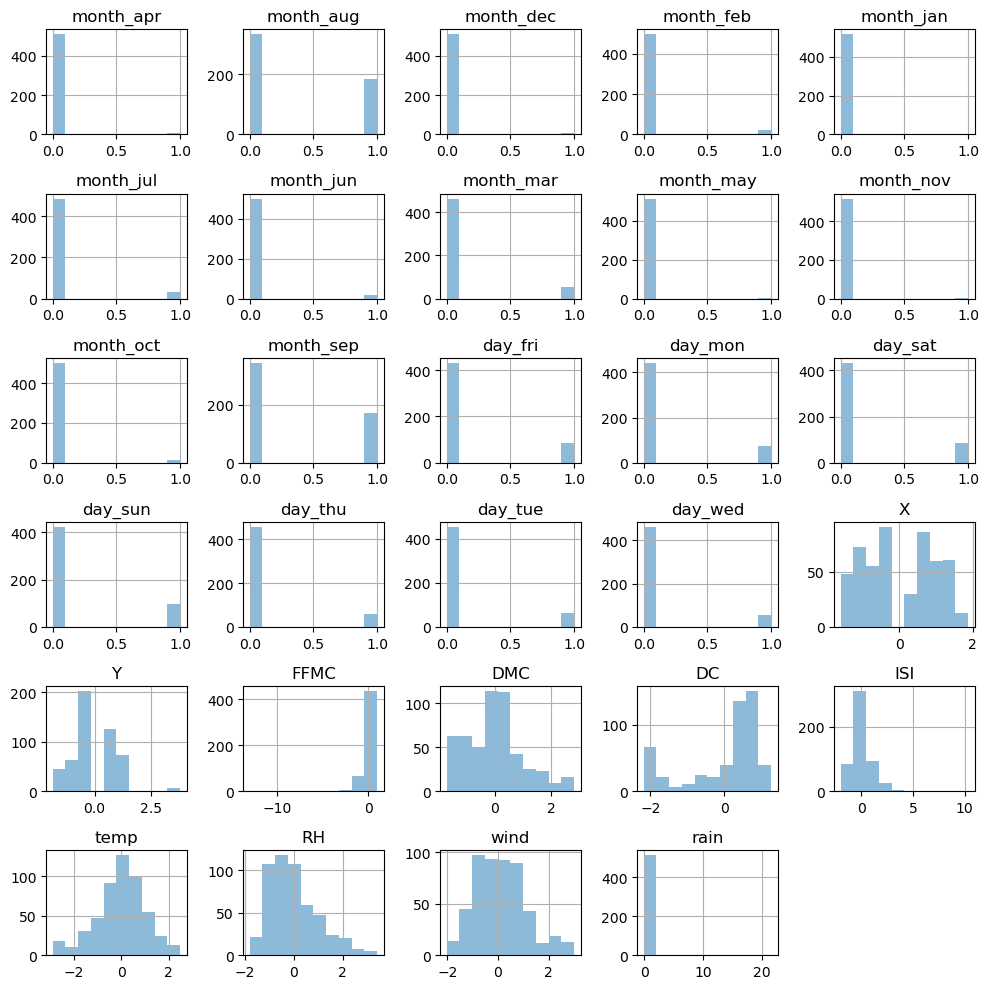

In [21]:
Thistograms = pd.DataFrame(X_transformed).hist(figsize= [10,10], alpha=0.5)
plt.tight_layout()
Thistograms
plt.show()

### Data seems to be skewed in the edges for all the mon and day features.

<Axes: >

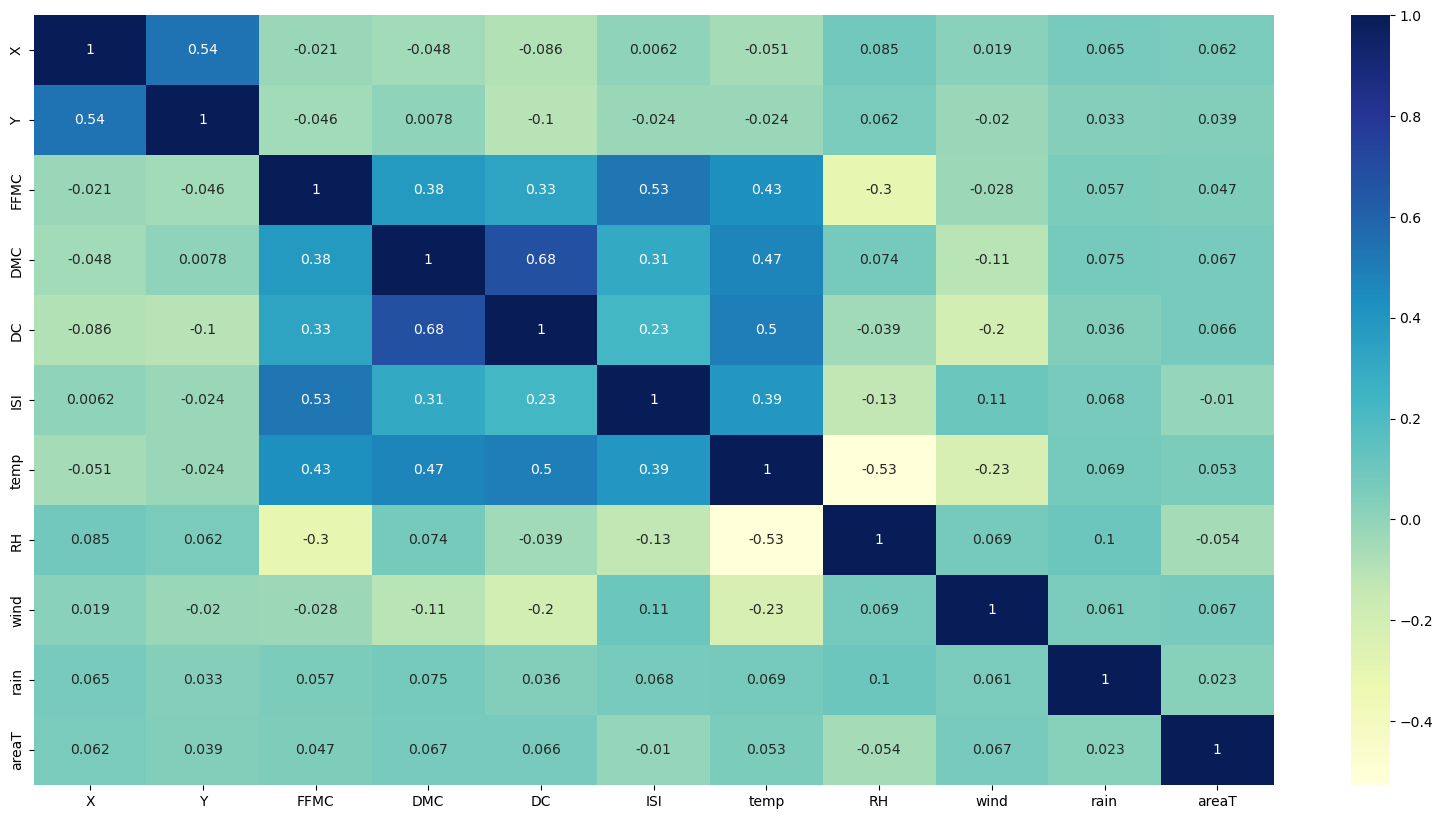

In [22]:
corr_df =  pd.concat([X.select_dtypes(exclude='category'),y], axis =1)

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_df.corr(), annot=True, cmap='YlGnBu')

### Observations:
#### No need to remove any features since not any features are highly correlated to target (area)

## Section 5: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
### Splitting test data as 25%

def train_split(x_data, y_data, split_size):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.25, random_state=42)
    print("Size of training data:",X_train.shape, y_train.shape)
    print("Size of test data:",X_test.shape, y_test.shape)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_split(X_transformed, y, 0.25)

Size of training data: (387, 29) (387,)
Size of test data: (130, 29) (130,)


## Section 6: Modeling

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
def run_vanilla_regressors(X_train, y_train, X_test, y_test):
  models = {'Linear': LinearRegression(),
            'KNR': KNeighborsRegressor(),
            'DTR': DecisionTreeRegressor(),
            'Ridge': Ridge(),
            'SVR': SVR()}

  results = {
      'MODEL' : [],
      'Train MSE': [],
      'MSE' : [],
      'MAE' : [],
      'Train R2' : [],
      'Test R2' :[],
      'Train Time' : [],
      'Inference Time' : []
  }

  for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    train_mse = mean_squared_error(y_train, model.predict(X_train))
    mse = mean_squared_error(y_test, y_pred)
    r2_result = r2_score(y_test, y_pred)
    train_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results['MODEL'].append(model_name)
    results['Train MSE'].append(train_mse)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['Train R2'].append(train_r2)
    results['Test R2'].append(r2_result)
    results['Train Time'].append(train_time)
    results['Inference Time'].append(inference_time)

  return results

In [25]:
result_df = pd.DataFrame(run_vanilla_regressors(X_train, y_train, X_test, y_test))
result_df

MODEL  Train MSE       MSE       MAE  Train R2   Test R2  Train Time  \
0  Linear   1.775328  2.080282  1.146576 -0.046329 -0.046329    0.014124   
1     KNR   1.617144  2.088916  1.127406 -0.050672 -0.050672    0.001022   
2     DTR   0.007539  4.066477  1.478088 -1.045334 -1.045334    0.008909   
3   Ridge   1.780998  2.013539  1.142304 -0.012759 -0.012759    0.007332   
4     SVR   1.704732  2.355902  1.091001 -0.184959 -0.184959    0.007216   

   Inference Time  
0        0.001993  
1        0.052471  
2        0.001468  
3        0.001468  
4        0.003612

In [26]:
baseline_lr_model = LinearRegression().fit(X_train, y_train)
train_preds = baseline_lr_model.predict(X_train)
test_preds = baseline_lr_model.predict(X_test)
baseline_train_r2 = round(baseline_lr_model.score(X_train, y_train),3)
baseline_test_r2 = round(baseline_lr_model.score(X_test, y_test),3)
print("Baseline Train R2:", baseline_train_r2)
print("Baseline Test R2:", baseline_test_r2)


### Cross Validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(baseline_lr_model, X_train, y_train, cv=10)
scores = pd.Series([round(i, 3) for i in scores])
print('Cross-Validation R2 Scores', scores)
scores.min(), round(scores.mean(), 3), scores.max()


Baseline Train R2: 0.084
Baseline Test R2: -0.046
Cross-Validation R2 Scores 0   -7.000000e-02
1    1.800000e-02
2   -2.460000e-01
3   -9.900000e-02
4   -1.933000e+00
5   -9.300000e-02
6   -3.400583e+21
7   -1.890486e+25
8   -2.000000e-01
9   -5.985790e+25
dtype: float64


(-5.985789779669682e+25, -7.876615350713662e+24, 0.018)

### Observations:

#### - All regressors have low mean square error
#### - R2 is very bad for all regressors
#### - Cross validation did not improve score on linear regression
#### - Since R2 are negative, we need to go back to data features and see if there is any standardization required

## Section 7: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Experiment 1: Removing X , Y did not improve the model R2. Results below

In [27]:
### Let me drop X and Y coordinates and see if there will be any difference in the model results

X_new = X_transformed.drop(['X','Y'], axis = 1 )

X_train, X_test, y_train, y_test = train_split(X_new, y, 0.25)
result_df_new = pd.DataFrame(run_vanilla_regressors(X_train, y_train, X_test, y_test))
result_df_new


Size of training data: (387, 27) (387,)
Size of test data: (130, 27) (130,)


MODEL  Train MSE       MSE       MAE  Train R2   Test R2  Train Time  \
0  Linear   1.794657  2.072676  1.142643 -0.042503 -0.042503    0.007330   
1     KNR   1.700627  2.131754  1.125969 -0.072218 -0.072218    0.000470   
2     DTR   0.097408  3.327122  1.311141 -0.673458 -0.673458    0.002290   
3   Ridge   1.798667  2.007400  1.139390 -0.009671 -0.009671    0.003318   
4     SVR   1.847810  2.337924  1.117015 -0.175916 -0.175916    0.004713   

   Inference Time  
0        0.001543  
1        0.059908  
2        0.000343  
3        0.000339  
4        0.002681

### GridSearch based model improvement

In [28]:
def gridsearch_regressor(model, model_name, X_train, X_test, y_train, y_test, params):
    
    knn_pipe = Pipeline([(model_name, model)])
    knn_pipe.fit(X_train, y_train)
    preds = knn_pipe.predict(X_test)
    train_mse = round(mean_squared_error(y_train, knn_pipe.predict(X_train)),3)
    test_mse = round(mean_squared_error(y_test, preds),3)


    print("Train MSE:", train_mse)
    print("Test MSE:", test_mse)

    #print(classification_report(y_test, preds))
    #print(confusion_matrix(y_test, preds))

    start_time = time.time()

    knn_grid = GridSearchCV(knn_pipe, param_grid=params, scoring = 'r2')
    knn_grid.fit(X_train, y_train)
    best_k = knn_grid.best_params_
    print("Best Params:", best_k)
    train_time = time.time() - start_time

    # Extract best estimator
    best_model = knn_grid.best_estimator_
    knn_grid_best_params = knn_grid.best_params_

    knn_grid_preds = best_model.predict(X_test)
    inference_time = time.time() - start_time

    knn_grid_train_r2 = round(best_model.score(X_train, y_train),3)
    knn_grid_test_r2 = round(best_model.score(X_test, y_test),3)
    mse = mean_squared_error(y_test, knn_grid_preds)
    train_mse = mean_squared_error(y_train, best_model.predict(X_train))
    mae = mean_absolute_error(y_test, knn_grid_preds)

    knn_grid_best_params['train_r2'] = knn_grid_train_r2
    knn_grid_best_params['test_r2'] = knn_grid_test_r2
    knn_grid_best_params['time'] = (time.time() - start_time)
    knn_grid_best_params['MSE']  = mse
    knn_grid_best_params['Train MSE']  = train_mse
    knn_grid_best_params['MAE']  = mae

    results_knn = {}

    results_knn['MODEL'] = (model_name)
    results_knn['Train MSE'] = train_mse
    results_knn['MSE'] = mse
    results_knn['MAE'] = mae
    results_knn['Train R2']= knn_grid_train_r2
    results_knn['Test R2']= knn_grid_test_r2
    results_knn['Train Time'] = train_time
    results_knn['Inference Time'] = inference_time

    print("Train MSE:", train_mse)
    print("Test MSE:", mse)

    result_df.loc[len(result_df)] = results_knn

    return (knn_grid_best_params, result_df)




## Section 8: Model Comparisons

Now, we aim to compare the performance of multiple regressors after finetuning using Grdsearch CV. Below my findings are presented in a `DataFrame`:


In [29]:
knn_model_name = 'KNN'
knn_model = KNeighborsRegressor()
knn_params = {'KNN__n_neighbors': range(1, 33, 2), 'KNN__weights': ['uniform', 'distance'],'KNN__p': [1, 2]}
knn_params, result_df = gridsearch_regressor(knn_model, knn_model_name, X_train, X_test, y_train, y_test, knn_params)



xgb_model_name = 'XGB'
xgb_model = xgboost.XGBRegressor()
xgb_params = {'XGB__max_depth': [3, 5, 7], 'XGB__n_estimators': [100, 200, 300]}
xgn_params, result_df = gridsearch_regressor(xgb_model, xgb_model_name, X_train, X_test, y_train, y_test, xgb_params)
result_df

Train MSE: 1.701
Test MSE: 2.132
Best Params: {'KNN__n_neighbors': 31, 'KNN__p': 2, 'KNN__weights': 'uniform'}
Train MSE: 1.8786466624115565
Test MSE: 2.1131506637083923
Train MSE: 0.099
Test MSE: 2.75
Best Params: {'XGB__max_depth': 3, 'XGB__n_estimators': 100}
Train MSE: 0.42094211074713545
Test MSE: 2.487776710906142


MODEL  Train MSE       MSE       MAE  Train R2   Test R2  Train Time  \
0  Linear   1.775328  2.080282  1.146576 -0.046329 -0.046329    0.014124   
1     KNR   1.617144  2.088916  1.127406 -0.050672 -0.050672    0.001022   
2     DTR   0.007539  4.066477  1.478088 -1.045334 -1.045334    0.008909   
3   Ridge   1.780998  2.013539  1.142304 -0.012759 -0.012759    0.007332   
4     SVR   1.704732  2.355902  1.091001 -0.184959 -0.184959    0.007216   
5     KNN   1.878647  2.113151  1.195895  0.031000 -0.063000    1.057758   
6     XGB   0.420942  2.487777  1.268784  0.783000 -0.251000    6.837956   

   Inference Time  
0        0.001993  
1        0.052471  
2        0.001468  
3        0.001468  
4        0.003612  
5        1.059391  
6        6.839902

## CONCLUSIONS  

#### - The Test R2 is still negative and not reliable from all models, including ensemble models like KNN and XGB Regressors.

## NEXT STEPS
#### - Apply Regularization techniques
#### - Tranform the skewed data features of months and day.
      Try Smoothing: Dince data is discrete (e.g., count data) and causing issues, I aim to try using smoothing techniques to mitigate the 0s and 1s effect. For example,  additive smoothing (adding a small constant to all values) or Laplace smoothing (adding a small constant to the count of each bin).
#### - Feature selection and fit polynomial regressor then GridSearchCV
#### - RNN model 
